In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/aquafarm_water_parameters_data.csv")

In [ ]:
data.tail(2000)

,sno,Temperature,pH,Turbidity,Water_quality
7623,7623,18.88,9.39,276,Bad
7624,7624,18.92,9.39,276,Bad
7625,7625,18.97,9.39,276,Bad
7626,7626,18.98,9.39,276,Bad
7627,7627,19.02,9.39,276,Bad
...,...,...,...,...,...
9618,9618,21.32,7.49,212,Good
9619,9619,21.32,7.49,212,Good
9620,9620,21.34,7.49,212,Good
9621,9621,21.34,7.50,212,Good


In [ ]:
data.dtypes

sno                int64
Temperature      float64
pH               float64
Turbidity          int64
Water_quality     object
dtype: object

In [ ]:
x=data.loc[:, 'Temperature':'Turbidity']

In [ ]:
x

,Temperature,pH,Turbidity
0,20.99,7.81,197
1,20.99,7.81,197
2,20.98,7.81,197
3,20.98,7.81,197
4,20.98,7.81,197
...,...,...,...
9618,21.32,7.49,212
9619,21.32,7.49,212
9620,21.34,7.49,212
9621,21.34,7.50,212


In [ ]:
len(x)

9623

In [ ]:
y=data.loc[:, 'Water_quality']

In [ ]:
y

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
9618    Good
9619    Good
9620    Good
9621    Good
9622    Good
Name: Water_quality, Length: 9623, dtype: object

In [ ]:
len(y)

9623

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_encode = LabelEncoder()
y=l_encode.fit_transform(y)

In [ ]:
print(y)

[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state =33)

In [ ]:
print(x_train)

      Temperature     pH  Turbidity
5870        21.44   7.96        209
3027        19.78  10.10        218
5891        21.35   7.99        210
5998        20.64   7.77        215
7158        17.85   8.25        266
...           ...    ...        ...
57          20.49   7.76        197
578         17.45   8.30        195
5848        21.46   7.88        208
2439        23.29   9.23        255
7188        17.76   9.10        266

[6736 rows x 3 columns]


In [ ]:
len(x_train)

6736

In [ ]:
print(x_test)

      Temperature    pH  Turbidity
8211        21.76  8.31        239
5355        22.90  7.52        196
8045        22.68  8.23        266
702         17.46  9.30        194
8773        16.96  7.10        218
...           ...   ...        ...
64          20.46  7.75        197
9283        19.59  7.12        209
1670        18.95  8.38        215
6216        19.07  6.98        225
9074        15.85  7.02        255

[2887 rows x 3 columns]


In [ ]:
len(x_test)

2887

In [ ]:
print(y_train)

[1 1 1 ... 1 0 0]


In [ ]:
len(y_train)

6736

In [ ]:
print(y_test)

[1 1 1 ... 1 1 0]


In [ ]:
len(y_test)

2887

#NaiveBayes Algorithm


In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(fit_prior=False)

In [ ]:
mnb.fit(x_train,y_train)

MultinomialNB(fit_prior=False)

In [ ]:
y_pred = mnb.predict(x_test)

In [ ]:
print(y_pred)

[1 1 0 ... 1 0 0]


In [ ]:
y_pred_vertical = y_pred.reshape(len(y_pred),1)
print(y_pred_vertical)

[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [0]]


In [ ]:
y_true_vertical = y_test.reshape(len(y_test),1)
print(y_true_vertical)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [0]]


In [ ]:
true_pred = np.concatenate((y_true_vertical, y_pred_vertical), axis=1)
print(true_pred)

[[1 1]
 [1 1]
 [1 0]
 ...
 [1 1]
 [1 0]
 [0 0]]


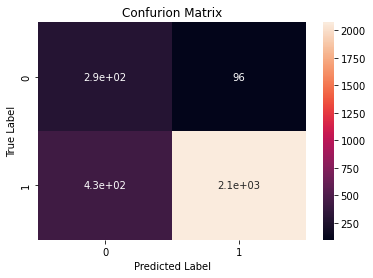

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat =confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_mat,annot= True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confurion Matrix")
plt.show()

In [ ]:
   from sklearn.metrics import accuracy_score
   accuracy_score(y_test,y_pred)

0.8188430897125043

#Prediction on new data

In [ ]:
prediction =mnb.predict([[20.1,7.5,220]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(prediction)

[1]


In [ ]:
if(prediction[0]==1):
    print("The water_quality is good")
else:
    print("The water_quality is bad")

The water_quality is good
